<a href="https://colab.research.google.com/github/sshhaaii/demo01/blob/main/lab2exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q 2 . lab exercise 

1.Create portfolio for the given stocks: 'GLD', 'AMZN for the last 10 years.

2.Visualize the expected returns on the 10 years series.

3.Evaluate the annual daily mean, correlation, Sharpe ratio and daily standard mean.
4. Discuss on the optimal portfolio and the different parameters evaluated for  the portfolio.

In [72]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:


from pandas_datareader import data as dr

In [74]:
stocks=['GLD','AMZN']


In [75]:

df= pd.DataFrame()
for i in stocks:
  df[i] = dr.DataReader(i, data_source = 'yahoo', start = '2012-02-03')['Adj Close']
  

In [76]:
df.head()

,GLD,AMZN
Date,,
2012-02-03,167.639999,187.679993
2012-02-06,167.179993,183.139999
2012-02-07,169.699997,184.190002
2012-02-08,168.500000,185.479996
2012-02-09,168.020004,184.979996


In [77]:
# 

logReturns=np.log(df/df.shift(1))
logReturns

,GLD,AMZN
Date,,
2012-02-03,NaN,NaN
2012-02-06,-0.002748,-0.024487
2012-02-07,0.014961,0.005717
2012-02-08,-0.007096,0.006979
2012-02-09,-0.002853,-0.002699
...,...,...
2022-02-23,0.004497,-0.036411
2022-02-24,-0.006471,0.044108
2022-02-25,-0.003336,0.015930


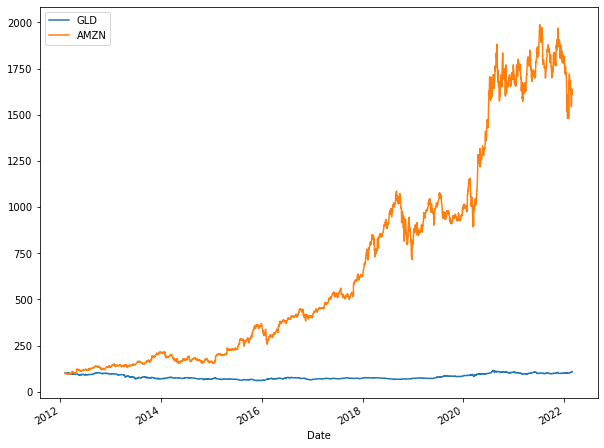

In [78]:
#2. Visualize the expected returns on the 10 years series.
(df/df.iloc[0] * 100).plot(figsize = (10,8))

In [79]:
#3. Evaluate the annual daily mean, correlation,   Sharpe ratio and daily standard mean.
logReturns = np.log(df/df.shift(1))
logReturns

,GLD,AMZN
Date,,
2012-02-03,NaN,NaN
2012-02-06,-0.002748,-0.024487
2012-02-07,0.014961,0.005717
2012-02-08,-0.007096,0.006979
2012-02-09,-0.002853,-0.002699
...,...,...
2022-02-23,0.004497,-0.036411
2022-02-24,-0.006471,0.044108
2022-02-25,-0.003336,0.015930


In [80]:
a=logReturns.mean()*250 #Annual Daily mean
print("Annual daily mean \n",a)


Annual daily mean 
 GLD     0.007902
AMZN    0.274192
dtype: float64


In [81]:
b=df.corr()
print("Corelation \n",a)

Corelation 
 GLD     0.007902
AMZN    0.274192
dtype: float64


In [82]:



df = pd.DataFrame()
for s in stocks:
  df[s]=dr.DataReader(s,data_source='yahoo',start='2010-12-31',end='2021-02-09')['Adj Close']

In [83]:
logReturns.std()


GLD     0.009494
AMZN    0.019140
dtype: float64

In [84]:
SR=logReturns.mean()/logReturns.std() #Shape ratio
SR


GLD     0.003329
AMZN    0.057302
dtype: float64

In [85]:
numberOfStocks = len(stocks)
numberOfStocks

2

In [86]:
#4. . Discuss on the optimal portfolio and the different parameters evaluated for the portfolio.
expectedReturn = []
standardDeviation = []
weightList0 = []
weightList1 = []


# Running simulations for finding optimum weights
for i in range(1000):
    weights = np.random.random(numberOfStocks)
    weights = weights/ weights.sum()
    weightList0.append(weights[0])
    weightList1.append(weights[1])
    expectedReturn.append((weights * logReturns.mean()).sum() * 250)
    standardDeviation.append(np.sqrt(np.dot(weights.T, np.dot(logReturns.cov() * 250, weights))))

#Converting lists into arrays
weightList0 = np.array(weightList0) #Weights for google
weightList1 = np.array(weightList1) #Weights for amazon
expectedReturn = np.array(expectedReturn) 
standardDeviation = np.array(standardDeviation)

#Creating dataframe
df1 = pd.DataFrame({"Weight of GLD ": weightList0, "Weight of Amazon": weightList1, "Expected Return": expectedReturn, "Standard deviation": standardDeviation})
df1.head()

,Weight of GLD,Weight of Amazon,Expected Return,Standard deviation
0,0.858585,0.141415,0.045560,0.135991
1,0.141618,0.858382,0.236481,0.260740
2,0.804819,0.195181,0.059877,0.134723
3,0.996650,0.003350,0.008795,0.149621
4,0.276069,0.723931,0.200678,0.223156


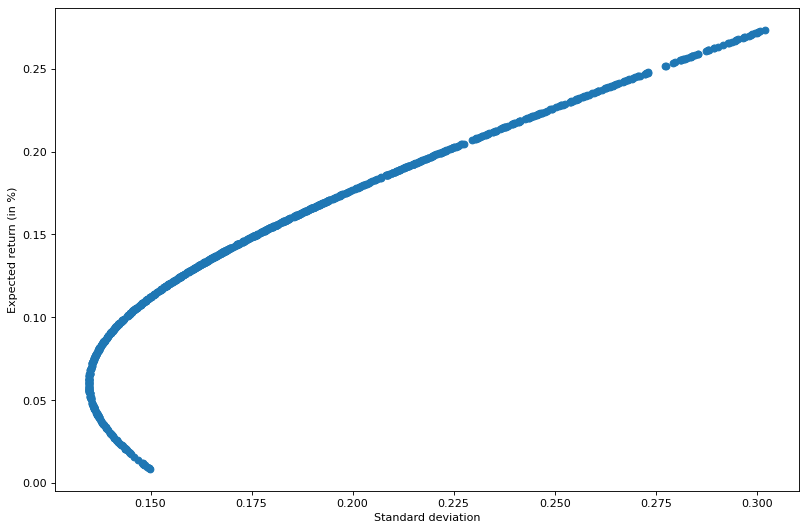

In [87]:
plt.figure(figsize=(12, 8), dpi=80)
plt.scatter(df1["Standard deviation"], df1["Expected Return"])
plt.xlabel("Standard deviation")
plt.ylabel("Expected return (in %)")
plt.show()

In [88]:
df1[(df1["Expected Return"]>0.21) & (df1["Expected Return"]< 0.26)].sort_values(by=['Expected Return'])    #minimum return


,Weight of GLD,Weight of Amazon,Expected Return,Standard deviation
714,0.239892,0.760108,0.210312,0.232997
585,0.238757,0.761243,0.210614,0.233310
349,0.238265,0.761735,0.210745,0.233445
536,0.237360,0.762640,0.210986,0.233694
208,0.233729,0.766271,0.211953,0.234696
...,...,...,...,...
205,0.062120,0.937880,0.257650,0.284029
493,0.061978,0.938022,0.257688,0.284072
655,0.060013,0.939987,0.258212,0.284655
885,0.057580,0.942420,0.258860,0.285378


In [89]:
df1["Expected Return"].mean()

0.14079626407617504

In [90]:
df1["Expected Return"].sort_values().median()

0.13958155067495354

In [91]:
df1[(df1["Expected Return"]>0.326)].sort_values(by=['Expected Return'])

,Weight of GLD,Weight of Amazon,Expected Return,Standard deviation
